In [ ]:
#Jupyter para explorações diversas, testes, "experimentação", com foco na base ouvidoria

In [176]:
#importa a biblioteca pandas
import pandas as pd

#importa o módulo de conexão com o MySQL
import mysql.connector

#importa o matplotlib (plotagem de gráficos)
import matplotlib.pyplot as plt

#importa a funçao train_test_split, para separar o dataset em dados de teste e dados de treinamento
from sklearn.model_selection import train_test_split

#importa o algoritmo KNN (K nearest neighbors) e ferramentas de medição do resultado (metrics)
from sklearn import neighbors, metrics

#importar o SVM (Support Vector Machine)
from sklearn import svm

#importa o Naive Bayes
from sklearn.naive_bayes import GaussianNB

#importa Regressão Logística
from sklearn.linear_model import LogisticRegression

#importa algoritmo de aplicação de Random Forest
from sklearn.ensemble import RandomForestClassifier

#importa a matriz de confusão e o relatório de classificação do scikit
from sklearn.metrics import confusion_matrix, classification_report

#importa o cálculo de médias do numpy
from numpy import mean

#importa o método cross_val_score para a aferição de resultados após aplicação de validação cruzada
from sklearn.model_selection import cross_val_score

#importa o stats para aplicação de cálculos estatísticos
import scipy.stats as stats

#importa contador do Python, para medição dos resultados de classes de variável
from collections import Counter

#importa SMOTE da biblioteca imblearn, para aplicação de Oversampling na base de treino
from imblearn.over_sampling import SMOTE

#importa RandomUnderSampler da biblioteca imblearn, para aplicação de Undersampling na base de treino
from imblearn.under_sampling import RandomUnderSampler

#importa o RepeatedStratifiedKFold para aplicação repetida de particionamentos de validação cruzada na base de dados
from sklearn.model_selection import RepeatedStratifiedKFold

#importa Pipeline da imblearn, para aplicação das estratégias de Resampling
from imblearn.pipeline import Pipeline

In [177]:
# aplicação do método ISO de encoding, uma vez que o padrão UTF-8 não se apresentou compatível, acusando erros de 
# carregamento
# df = pd.read_csv(r"C:\Users\Luiza\Desktop\BasesTCC\cadastro.csv", sep=';', encoding='ISO-8859-1')

In [178]:
db = mysql.connector.connect(
    host = "localhost",
    user = "root",
    passwd="mydbwork",
    db = "puc")


In [173]:
#Chamamento da base crua, para visualizações iniciais

mycursor = db.cursor()

mycursor.execute("""SELECT * from ouvidoria""")
dados = mycursor.fetchall()

df = pd.DataFrame(dados)

In [5]:
#Chamamento parcial da base após tratamentos de pré-processamento

mycursor = db.cursor()

mycursor.execute("""SELECT  id, Cod_Assunto, Cod_Produto, Gestor, sol, contagem, prazo_medio, uf_id, Bacen
                    FROM base_unificada""")
dados = mycursor.fetchall()

df = pd.DataFrame(dados, columns=['Cliente','Assunto', 'Produto', 'Gestor', 'Solucao', 'Contagem', 'Prazo', 'UF','Bacen'])

In [179]:
#Chamamento da base final para testes

mycursor = db.cursor()

mycursor.execute("""SELECT  Cod_Assunto, Gestor, sol, contagem, prazo_medio,
                    uf_id, VL_REND_LQDO, idade, COD_GRAU_INST, COD_ETDO_CVIL, Bacen FROM base_unificada""")
dados = mycursor.fetchall()

df = pd.DataFrame(dados, columns=['Assunto', 'Gestor', 'Solucao', 'Contagem', 'Prazo', 'UF', 'Renda',
                                  'Idade', 'Escolaridade', 'Estado_Civil', 'Bacen'])

In [174]:
#base crua. Visão inicial da quantidade de registros
df.shape

(58753, 23)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58753 entries, 0 to 58752
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       58753 non-null  int64 
 1   1       58753 non-null  int64 
 2   2       58753 non-null  object
 3   3       58753 non-null  int64 
 4   4       58753 non-null  object
 5   5       58753 non-null  object
 6   6       58753 non-null  object
 7   7       58753 non-null  object
 8   8       58753 non-null  int64 
 9   9       58753 non-null  int64 
 10  10      58753 non-null  int64 
 11  11      58753 non-null  object
 12  12      58753 non-null  int64 
 13  13      58753 non-null  object
 14  14      58753 non-null  object
 15  15      58753 non-null  object
 16  16      58753 non-null  object
 17  17      58753 non-null  object
 18  18      58753 non-null  object
 19  19      58753 non-null  object
 20  20      58753 non-null  object
 21  21      58753 non-null  object
 22  22      58753 non-null

In [ ]:
#visualizações após tratamento da base

In [91]:
df.isnull().values.any()

True

In [138]:

df.isnull().sum()

Cliente        0
Assunto        0
Produto        0
Gestor      6676
Solucao        0
Contagem       0
Prazo          0
UF           423
Bacen          0
dtype: int64

In [192]:
df['Gestor'] = df['Gestor'].fillna(0)

In [193]:
df[df["Gestor"]==0]

,Cliente,Assunto,Produto,Gestor,Solucao,Contagem,Prazo,UF,Bacen
0,1,20459,0,0.0,1,1,0,NaN,0
1,2,21104,52,0.0,1,1,5,NaN,0
2,3,21349,458,0.0,0,1,7,NaN,0
3,4,20050,9,0.0,1,2,8,NaN,0
4,4,20050,9,0.0,1,2,8,NaN,0
...,...,...,...,...,...,...,...,...,...
6671,4706,20051,0,0.0,0,1,10,0.0,0
6672,4707,21107,436,0.0,0,1,10,0.0,0
6673,4708,21559,0,0.0,1,1,9,0.0,0
6674,4709,21518,425,0.0,1,1,6,0.0,0


In [141]:
#Campos NaN são definidos como float pelo pandas. Assim, farei o ajuste para int
df["Gestor"] = df["Gestor"].astype('int')

In [ ]:
#aplicação de estratégia de preenchimento para os registros inexistentes na coluna Gestor, através do Workbench, com base
#na informação de Assuntos. Script fornecido.

In [143]:
#Confirmação de que a associação dos assuntos aos Gestores funcionou. Não há qualquer campo em que haja Assunto
mask1 = df["Gestor"] == 0
mask2 = df["Assunto"] == 0
df[mask1 & mask2]

,Cliente,Assunto,Produto,Gestor,Solucao,Contagem,Prazo,UF,Bacen


In [195]:
df[df["Assunto"]== 0]

,Cliente,Assunto,Produto,Gestor,Solucao,Contagem,Prazo,UF,Bacen


In [202]:
df[df["Gestor"]==0]

,Cliente,Assunto,Produto,Gestor,Solucao,Contagem,Prazo,UF,Bacen


In [175]:
df[df["Produto"]== 0]

,Cliente,Assunto,Produto,Gestor,Solucao,Contagem,Prazo,UF,Bacen
0,1,20459,0,9973,1,1,0,NaN,0
11,8,20966,0,9973,1,1,9,NaN,0
12,9,20315,0,9973,0,1,6,NaN,0
16,13,20016,0,9973,1,2,2,NaN,0
17,13,20016,0,9973,1,2,2,NaN,0
...,...,...,...,...,...,...,...,...,...
58088,40847,20019,0,9973,0,1,5,12.0,0
58091,40849,20709,0,9973,1,1,0,12.0,0
58129,40877,20054,0,9973,0,1,9,12.0,1
58135,40883,20817,0,9973,1,1,9,12.0,0


In [ ]:
#a informação de Produto veio comprometida de forma substancial. 8.806 registros inexistentes na base (não existe)
#produto com código 0. Entretanto, tal informação pode ser substituída pela utilização da variável Assunto, que, em 
#essência nos traz a mesma informação, mas de forma mais específica, informando qual o problema enfrentado com o produto
#em questao. Por exemplo: enquanto o campo produto nos traz a informação "Empréstimo", o campo assunto nos traz a 
#a informação "Empréstimo/Dificuldade de Contratação" e a cada assunto é atribuído um código.Ainda assim, poderia ser 
#definida uma estratégia de preenchimento do Produto a partir do Gestor, mas há gestores com dezenas de produtos sob sua
#responsabilidade, o que dificulta muito a presunção sobre o produto envolvido e, como dito, o Assunto já traz informações
#específicas e mais amplas, razão pela qual descartaremos a utilização da variável Produto.


In [201]:
df.isnull().sum()

Cliente       0
Assunto       0
Produto       0
Gestor        0
Solucao       0
Contagem      0
Prazo         0
UF          423
Bacen         0
dtype: int64

In [181]:
df[df["UF"]==0]

,Cliente,Assunto,Produto,Gestor,Solucao,Contagem,Prazo,UF,Bacen
33,28,21263,528,8593,0,1,9,0.0,0
34,29,21119,52,9973,0,1,5,0.0,0
35,30,21106,52,9973,1,1,0,0.0,0
36,31,20049,6,9973,1,1,4,0.0,0
37,32,20952,6,9973,0,1,6,0.0,1
...,...,...,...,...,...,...,...,...,...
7074,4995,20232,9,9880,0,1,8,0.0,0
7075,4996,21027,196,8593,0,1,10,0.0,0
7076,4997,21080,52,9973,0,1,6,0.0,0
7077,4998,20737,9,9880,1,1,0,0.0,0


In [81]:
df[df["Estado_Civil"].isnull()]

,Assunto,Produto,Gestor,Solucao,Contagem,Prazo,UF,Renda,Idade,Escolaridade,Estado_Civil,Bacen


In [123]:
df[df["Assunto"].isnull()]

,Assunto,Produto,Gestor,Solucao,Contagem,Prazo,Bacen


In [124]:
df[df["Produto"].isnull()]

,Assunto,Produto,Gestor,Solucao,Contagem,Prazo,Bacen


In [41]:
df[df["Gestor"].isnull()]

,Cliente,Assunto,Produto,Gestor,Solucao,Contagem,Prazo,Bacen


In [ ]:
###########

In [ ]:
############       TESTES    com base "suja"", superficiais, apenas para insights iniciais          ###############

In [ ]:
#########                                    ###############

In [11]:
df[["Renda"]].isnull().all(axis=1).sum()

10

In [12]:
df.dropna(subset=["Gestor"], how='all', inplace= True)

In [13]:
df.dropna(subset=["UF"], how='all', inplace= True)

In [14]:
# Ajustar Renda

In [15]:
df = df.set_index(["Idade", "Escolaridade"])

In [16]:
df["Media"] = df.groupby(["Idade", "Escolaridade"]).agg({"Renda": "mean"})

In [17]:
df = df.reset_index()

In [18]:
for row in df.itertuples():
    if pd.isnull(row.Renda):
        df.at[row.Index, "Renda"] = df.at[row.Index,"Media"]     
    else:
        pass 

In [19]:
df.head(200).sort_values("Renda", ascending = False, na_position = "first")

,Idade,Escolaridade,Assunto,Produto,Gestor,Solucao,Contagem,Prazo,UF,Renda,Estado_Civil,Bacen,Media
93,45,3,20905,386,9973.0,1,3,0,25.0,7.0,1,0,1.917526
115,46,3,21162,1017,8596.0,1,1,10,1.0,7.0,1,0,1.857143
10,78,5,21282,434,8008.0,1,1,6,1.0,6.0,1,0,3.918919
118,82,5,21507,6,9973.0,1,1,6,1.0,6.0,1,0,3.300000
24,65,3,21164,1017,8596.0,1,1,7,1.0,6.0,1,0,2.151261
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,35,3,20227,9,9880.0,1,1,0,12.0,1.0,1,0,1.632959
122,37,0,21157,1020,8596.0,1,1,2,8.0,1.0,1,0,1.500000
39,74,2,21457,6,9973.0,1,1,13,25.0,1.0,1,0,1.592593
120,80,2,21518,52,9973.0,1,1,3,12.0,1.0,1,0,1.970588


In [20]:
df[["Renda"]].isnull().all(axis=1).sum()

0

In [21]:
df[df["Renda"]==df["Media"]]

,Idade,Escolaridade,Assunto,Produto,Gestor,Solucao,Contagem,Prazo,UF,Renda,Estado_Civil,Bacen,Media
90,96,3,21457,6,9973.0,1,1,17,7.0,2.0,1,0,2.0
110,60,8,21518,52,9973.0,1,2,26,25.0,4.0,1,0,4.0
164,77,0,20001,9,9880.0,1,1,2,12.0,1.0,1,0,1.0
179,38,8,21595,434,8008.0,0,4,6,1.0,3.0,3,1,3.0
233,58,0,21259,257,9951.0,1,1,7,12.0,1.0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24613,24,0,20685,580,9880.0,1,1,5,24.0,1.0,0,0,1.0
24620,24,0,21121,8,9973.0,1,2,0,12.0,1.0,0,0,1.0
24637,19,9,20936,6,9973.0,1,1,0,24.0,1.0,1,0,1.0
24652,79,6,21457,6,9973.0,0,2,9,7.0,4.0,1,0,4.0


In [22]:
df = df.drop("Media", 1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24858 entries, 0 to 24857
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Idade         24858 non-null  int64  
 1   Escolaridade  24858 non-null  int64  
 2   Assunto       24858 non-null  int64  
 3   Produto       24858 non-null  int64  
 4   Gestor        24858 non-null  float64
 5   Solucao       24858 non-null  int64  
 6   Contagem      24858 non-null  int64  
 7   Prazo         24858 non-null  int64  
 8   UF            24858 non-null  float64
 9   Renda         24858 non-null  float64
 10  Estado_Civil  24858 non-null  int64  
 11  Bacen         24858 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 2.3 MB


In [242]:
df["UF"] = df["UF"].astype('int')

In [245]:
df["Gestor"] = df["Gestor"].astype('int')

In [29]:
df.head(10)

,Idade,Escolaridade,Assunto,Produto,Gestor,Solucao,Contagem,Prazo,UF,Renda,Estado_Civil,Bacen
0,54,3,21104,52,9973,1,1,5,1,3,1,0
1,82,3,21349,458,8869,1,1,7,12,1,1,0
2,84,5,20050,9,9880,1,2,8,1,3,1,0
3,77,5,21119,52,9973,1,2,4,1,3,1,0
4,56,3,20157,9,9880,1,2,0,7,3,1,0
5,64,3,20050,9,9880,1,2,7,7,3,1,0
6,66,5,21518,8,9973,1,1,5,1,5,1,0
7,94,5,20947,6,9973,1,1,6,1,1,1,0
8,53,3,20227,9,9880,1,1,0,1,2,1,0
9,69,5,21027,196,8593,1,1,10,1,5,1,0


In [95]:
df.dropna(subset=["Gestor"], how='all', inplace= True)

In [96]:
df.dropna(subset=["UF"], how='all', inplace= True)

In [97]:
df.dropna(subset=["Idade"], how='all', inplace= True)

In [98]:
# Ajustar Renda

In [99]:
df = df.set_index(["Idade", "Escolaridade"])

In [100]:
df["Media"] = df.groupby(["Idade", "Escolaridade"]).agg({"Renda": "mean"})

In [101]:
df = df.reset_index()

In [102]:
for row in df.itertuples():
    if pd.isnull(row.Renda):
        df.at[row.Index, "Renda"] = df.at[row.Index,"Media"]     
    else:
        pass

In [103]:
df[df["Renda"]==df["Media"]]

,Idade,Escolaridade,Assunto,Gestor,Solucao,Contagem,Prazo,UF,Renda,Estado_Civil,Bacen,Media
91,96,3,21457,9973,1,1,17,7,2.0,1,0,2.0
111,60,8,21518,9973,1,2,26,25,4.0,1,0,4.0
167,77,0,20001,9880,1,1,2,12,1.0,1,0,1.0
184,38,8,21595,8008,0,4,6,1,3.0,3,1,3.0
239,58,0,21259,9951,1,1,7,12,1.0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25411,24,0,21121,9973,1,2,0,12,1.0,0,0,1.0
25425,19,9,21487,9973,1,2,0,7,1.0,1,0,1.0
25429,19,9,20936,9973,1,1,0,24,1.0,1,0,1.0
25445,79,6,21457,9973,0,2,9,7,4.0,1,0,4.0


In [104]:
df = df.drop("Media", 1)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25657 entries, 0 to 25656
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Idade         25657 non-null  int64  
 1   Escolaridade  25657 non-null  int64  
 2   Assunto       25657 non-null  int64  
 3   Gestor        25657 non-null  int64  
 4   Solucao       25657 non-null  int64  
 5   Contagem      25657 non-null  int64  
 6   Prazo         25657 non-null  int64  
 7   UF            25657 non-null  int64  
 8   Renda         25657 non-null  float64
 9   Estado_Civil  25657 non-null  int64  
 10  Bacen         25657 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 2.2 MB


<AxesSubplot:>

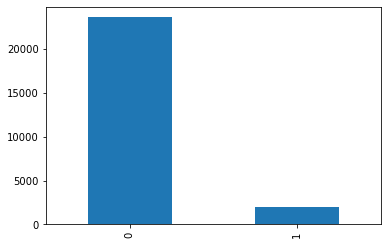

In [258]:
df['Bacen'].value_counts().plot(kind='bar')

In [273]:
correlacao = df.corr()
correlacao.style.background_gradient(cmap='YlOrRd').set_precision(3)

,Idade,Escolaridade,Assunto,Produto,Gestor,Solucao,Contagem,Prazo,UF,Renda,Estado_Civil,Bacen
Idade,1.000,-0.200,0.075,0.028,-0.066,-0.068,-0.004,0.131,-0.081,0.277,0.202,-0.004
Escolaridade,-0.200,1.000,-0.022,0.004,0.010,-0.064,-0.029,0.077,-0.030,0.164,-0.005,0.091
Assunto,0.075,-0.022,1.000,0.294,-0.282,-0.059,-0.005,0.061,0.002,0.006,0.034,0.025
Produto,0.028,0.004,0.294,1.000,-0.390,-0.001,-0.014,0.028,0.015,0.041,-0.014,-0.031
Gestor,-0.066,0.010,-0.282,-0.390,1.000,0.012,0.005,-0.041,-0.005,-0.023,0.001,0.037
Solucao,-0.068,-0.064,-0.059,-0.001,0.012,1.000,-0.044,-0.179,0.024,-0.109,-0.330,-0.501
Contagem,-0.004,-0.029,-0.005,-0.014,0.005,-0.044,1.000,-0.042,0.002,-0.015,0.034,0.194
Prazo,0.131,0.077,0.061,0.028,-0.041,-0.179,-0.042,1.000,-0.017,0.116,0.056,0.121
UF,-0.081,-0.030,0.002,0.015,-0.005,0.024,0.002,-0.017,1.000,-0.105,-0.065,-0.026
Renda,0.277,0.164,0.006,0.041,-0.023,-0.109,-0.015,0.116,-0.105,1.000,0.093,0.097


In [151]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [124]:
#teste de hipóteses T-Student (2 sample) entre a variável de interesse no dataset original e na base de testes
stats.ttest_ind(a = y_test, b = y)

Ttest_indResult(statistic=-0.1235237891406233, pvalue=0.9016930818480098)

In [161]:
model = RandomForestClassifier(n_estimators = 100, class_weight={0:1, 1:30})

In [109]:
df.dropna(subset=["Gestor"], how='all')

,Idade,Escolaridade,Assunto,Gestor,Solucao,Contagem,Prazo,UF,Renda,Estado_Civil,Bacen
0,54,3,21104,9973,1,1,5,1,3.0,1,0
1,82,3,21349,8869,1,1,7,12,1.0,1,0
2,84,5,20050,9880,1,2,8,1,3.0,1,0
3,77,5,21119,9973,1,2,4,1,3.0,1,0
4,56,3,20157,9880,1,2,0,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
25652,32,3,20731,9973,1,5,3,7,2.0,1,0
25653,34,3,21157,8596,0,1,2,12,1.0,1,0
25654,58,5,20024,9880,1,2,0,12,6.0,7,0
25655,47,9,21296,8869,1,1,5,24,1.0,1,0


In [110]:
df.dropna(subset=["UF"], how='all')

,Idade,Escolaridade,Assunto,Gestor,Solucao,Contagem,Prazo,UF,Renda,Estado_Civil,Bacen
0,54,3,21104,9973,1,1,5,1,3.0,1,0
1,82,3,21349,8869,1,1,7,12,1.0,1,0
2,84,5,20050,9880,1,2,8,1,3.0,1,0
3,77,5,21119,9973,1,2,4,1,3.0,1,0
4,56,3,20157,9880,1,2,0,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
25652,32,3,20731,9973,1,5,3,7,2.0,1,0
25653,34,3,21157,8596,0,1,2,12,1.0,1,0
25654,58,5,20024,9880,1,2,0,12,6.0,7,0
25655,47,9,21296,8869,1,1,5,24,1.0,1,0


In [111]:
df.dropna(subset=["Idade"], how='all')

,Idade,Escolaridade,Assunto,Gestor,Solucao,Contagem,Prazo,UF,Renda,Estado_Civil,Bacen
0,54,3,21104,9973,1,1,5,1,3.0,1,0
1,82,3,21349,8869,1,1,7,12,1.0,1,0
2,84,5,20050,9880,1,2,8,1,3.0,1,0
3,77,5,21119,9973,1,2,4,1,3.0,1,0
4,56,3,20157,9880,1,2,0,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
25652,32,3,20731,9973,1,5,3,7,2.0,1,0
25653,34,3,21157,8596,0,1,2,12,1.0,1,0
25654,58,5,20024,9880,1,2,0,12,6.0,7,0
25655,47,9,21296,8869,1,1,5,24,1.0,1,0


In [112]:
df.dropna(subset=["Renda"], how='all')

,Idade,Escolaridade,Assunto,Gestor,Solucao,Contagem,Prazo,UF,Renda,Estado_Civil,Bacen
0,54,3,21104,9973,1,1,5,1,3.0,1,0
1,82,3,21349,8869,1,1,7,12,1.0,1,0
2,84,5,20050,9880,1,2,8,1,3.0,1,0
3,77,5,21119,9973,1,2,4,1,3.0,1,0
4,56,3,20157,9880,1,2,0,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
25652,32,3,20731,9973,1,5,3,7,2.0,1,0
25653,34,3,21157,8596,0,1,2,12,1.0,1,0
25654,58,5,20024,9880,1,2,0,12,6.0,7,0
25655,47,9,21296,8869,1,1,5,24,1.0,1,0


In [113]:
df["Renda"] = df["Renda"].astype('int')

In [162]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 30})

In [163]:
magica = model.predict(X_test)

In [164]:
print("Relatório de Performance:")
print(classification_report(y_test, magica))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, magica))


Relatório de Performance:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7144
           1       0.90      0.80      0.85       554

    accuracy                           0.98      7698
   macro avg       0.94      0.90      0.92      7698
weighted avg       0.98      0.98      0.98      7698

Matriz de Confusão:
[[7094   50]
 [ 110  444]]


In [134]:
#Extrair amostra do dataset
df_amostra = df.sample(frac=1,random_state=4)

#Separar a classe de interesse
Bacen_1 = df_amostra.loc[df["Bacen"] == 1]

#Identificar a quantidade de casos positivos para a classe de interesse
Bacen_1.count()


Idade           1944
Escolaridade    1944
Assunto         1944
Gestor          1944
Solucao         1944
Contagem        1944
Prazo           1944
UF              1944
Renda           1944
Estado_Civil    1944
Bacen           1944
dtype: int64

<AxesSubplot:>

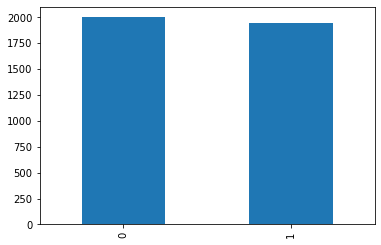

In [135]:
#Selecionar 2000 registros de Bacen = 0 para reduzir o desbalanceamento da base
Bacen_0 = df_amostra.loc[df_amostra["Bacen"] == 0].sample(n=2000,random_state=42)

#Criar o Dataframe de teste
df_ajustado = pd.concat([Bacen_1, Bacen_0])

#Plotar a variável de interesse
df_ajustado['Bacen'].value_counts().plot(kind='bar')

In [136]:
contar = Counter(df_ajustado["Bacen"])
print(contar)

Counter({0: 2000, 1: 1944})


In [137]:
correlacao = df_ajustado.corr()
correlacao.style.background_gradient(cmap='YlOrRd').set_precision(3)

,Idade,Escolaridade,Assunto,Gestor,Solucao,Contagem,Prazo,UF,Renda,Estado_Civil,Bacen
Idade,1.000,-0.259,0.069,-0.040,-0.021,0.035,0.053,-0.067,0.233,0.165,-0.006
Escolaridade,-0.259,1.000,0.005,-0.017,-0.130,0.033,0.112,-0.025,0.126,0.044,0.168
Assunto,0.069,0.005,1.000,-0.268,-0.067,0.015,0.032,-0.015,0.017,0.037,0.044
Gestor,-0.040,-0.017,-0.268,1.000,-0.027,0.017,0.003,-0.015,0.001,0.030,0.069
Solucao,-0.021,-0.130,-0.067,-0.027,1.000,-0.216,-0.240,0.057,-0.114,-0.444,-0.691
Contagem,0.035,0.033,0.015,0.017,-0.216,1.000,0.034,-0.013,0.061,0.188,0.419
Prazo,0.053,0.112,0.032,0.003,-0.240,0.034,1.000,-0.044,0.136,0.133,0.273
UF,-0.067,-0.025,-0.015,-0.015,0.057,-0.013,-0.044,1.000,-0.071,-0.041,-0.056
Renda,0.233,0.126,0.017,0.001,-0.114,0.061,0.136,-0.071,1.000,0.147,0.179
Estado_Civil,0.165,0.044,0.037,0.030,-0.444,0.188,0.133,-0.041,0.147,1.000,0.469


In [226]:
mycursor.close()
db.close

<bound method MySQLConnection.close of <mysql.connector.connection.MySQLConnection object at 0x00000272CD721DA0>>